In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## bh testing summary ##
# n_rej = 8429
# t_rej = 0.008426


FDP: 0.08031794993474908 

## sbh summary ##
# n_rej = 9494
# t_rej = 0.011751
# pi_0 estimate = 0.808


FDP: 0.10037918685485568



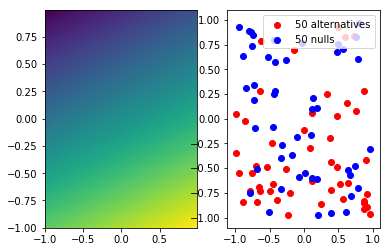

In [2]:
## generating a 1d toy data 
p,h,x=load_2Dslope(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

### Testing 2D LT 
Screen Shot 2018-03-02 at 12.10.50 AM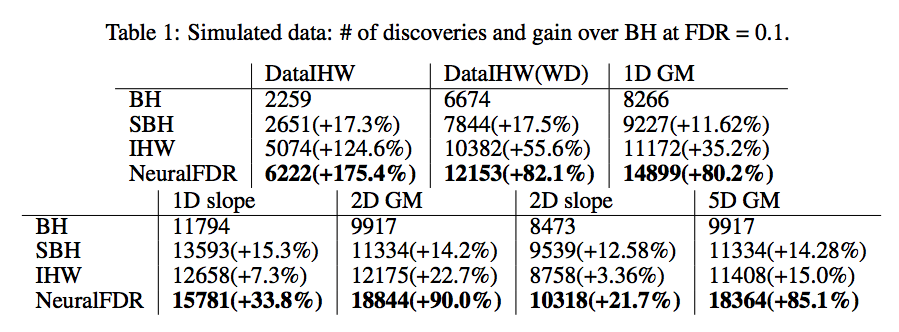

In [3]:
_=PrimFDR_cv(p,x,5,alpha=0.1,n_itr=10000,h=None,verbose=True)

#time start: 0.0s
#time input: 0.0070s
## testing fold 1: 0.0071s
pfdr_test start
PrimFDR start
gamma1 0.25028386732740215
0 0.9999999999999999 7841 2614 0.3333758449177401
0 0.49999999999999994 5716 1351 0.23635409377186845
0 0.24999999999999997 4320 632 0.14629629629629629
0 0.12499999999999999 3308 334 0.10096735187424426
0 0.06249999999999999 2595 162 0.06242774566473988
0.031249999999999997 0.06249999999999999 2982 252 0.08450704225352113
0.04687499999999999 0.06249999999999999 3153 293 0.09292737075800825
0.05468749999999999 0.06249999999999999 3231 313 0.09687403280718045
0.05859374999999999 0.06249999999999999 3265 316 0.09678407350689128
0.06054687499999999 0.06249999999999999 3284 326 0.09926918392204628
0.06152343749999999 0.06249999999999999 3295 331 0.10045523520485584
0.06152343749999999 0.06201171874999999 3292 327 0.09933171324422843
0.06176757812499999 0.06201171874999999 3292 329 0.09993924665856622
0.06188964843749999 0.06201171874999999 3293 330 0.10021257212268449


0.9611361299080219 1.4417041948620328 3630 404 0.11129476584022038
0.9611361299080219 1.2014201623850274 3492 365 0.10452462772050401
0.9611361299080219 1.0812781461465246 3409 345 0.10120269873863302
0.9611361299080219 1.0212071380272731 3371 339 0.10056363097003856
0.9611361299080219 0.9911716339676475 3354 336 0.1001788908765653
0.9611361299080219 0.9761538819378347 3340 334 0.1
0.9611361299080219 0.9686450059229283 3331 331 0.09936955869108376
0.9648905679154751 0.9686450059229283 3337 332 0.09949056038357806
0.9667677869192017 0.9686450059229283 3339 333 0.09973045822102426
0.967706396421065 0.9686450059229283 3339 334 0.10002994908655286
0.967706396421065 0.9681757011719967 3339 334 0.10002994908655286
0.967706396421065 0.9679410487965309 3339 333 0.09973045822102426
0.967823722608798 0.9679410487965309 3339 333 0.09973045822102426
0.9678823857026644 0.9679410487965309 3339 334 0.10002994908655286
0.9678823857026644 0.9679117172495977 3339 334 0.10002994908655286
0.96788238570266

#time test: 5858.4363s
# total rejection: 9815 [3209, 3282, 3324]
#time total: 5858.4370s


## PrimFDR_init starts
# Learning null distribution
Slope: w=0.958583877119167, a=[-0.13649902  0.3517627 ]
Bump 0: w=0.0067840666335559595, mu=[0.67992686 0.20050144], sigma=[0.11498485 0.07665544]
Bump 1: w=0.011651835550124692, mu=[0.61908974 0.54805825], sigma=[0.13130717 0.10952035]
Bump 2: w=0.006929448371956802, mu=[0.28519717 0.69968975], sigma=[0.10084092 0.11036135]
Bump 3: w=0.008950140725657378, mu=[0.29450991 0.35764617], sigma=[0.10201249 0.11902342]
Bump 4: w=0.00710063159953789, mu=[0.63819587 0.81410201], sigma=[0.12583337 0.06666171]


# Learning alternative distribution
Slope: w=0.9205595389749117, a=[ 0.54705566 -1.40615723]
Bump 0: w=0.010850376913647788, mu=[0.7758439  0.55143396], sigma=[0.08411612 0.11563906]
Bump 1: w=0.018615183201027365, mu=[0.17940959 0.14439267], sigma=[0.07155041 0.05978652]
Bump 2: w=0.015505140666779627, mu=[0.8660723  0.26602908], sigma=[0.05659103 0.09385346]
Bump 3: w=0.015496944388263358, mu=[0.31605628 0.47243508], sigma=[0.13241368

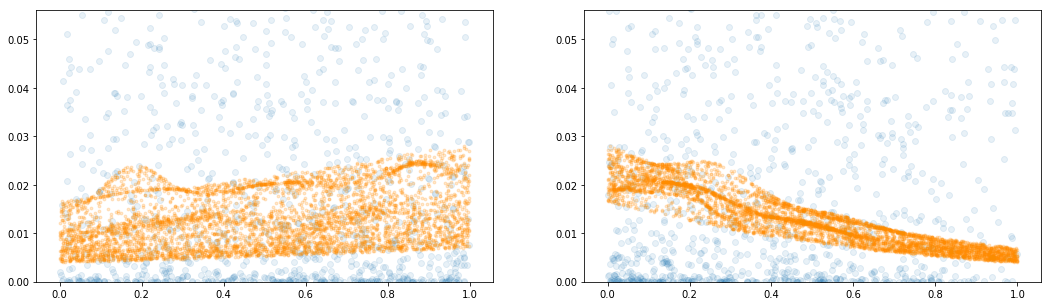

## PrimFDR_init finishes

gamma1 0.2477837421318421
0 0.9999999999999998 23507 7837 0.3333900540264602
0 0.4999999999999999 17027 3949 0.2319257649615317
0 0.24999999999999994 12835 1960 0.1527074405921309
0 0.12499999999999997 9894 1006 0.1016777845158682
0 0.062499999999999986 7750 489 0.0630967741935484
0.031249999999999993 0.062499999999999986 8931 757 0.08476094502295375
0.046874999999999986 0.062499999999999986 9445 891 0.09433562731604023
0.054687499999999986 0.062499999999999986 9685 953 0.09839958699019102
0.058593749999999986 0.062499999999999986 9801 983 0.10029588817467605
0.058593749999999986 0.060546874999999986 9749 967 0.09918966047799774
0.059570312499999986 0.060546874999999986 9769 977 0.10001023646227863
0.059570312499999986 0.060058593749999986 9763 974 0.09976441667520229
0.059814453124999986 0.060058593749999986 9766 976 0.09993856235920541
0.059936523437499986 0.060058593749999986 9767 976 0.09992833009112317
0.059997558593749986 0.060058593749999986 9768 977 0.

## iteration 9
n_rej:  10282
n_rej sig:  10204.743
FD esti mirror: 1058
FD esti mirror sig: 1059.0529
loss1:  [-0.10204743]
loss2:  [0.03857855]
Estimated FDP: [0.10378045]
FDP: 0.0
Slope: a=[ 0.49717587 -1.4560051 ], b=[-4.0052214]
Bump 0: w=-5.9870687, mu=[0.72663456 0.5016221 ], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.625115, mu=[0.15141487 0.09520851], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.0253487, mu=[0.8165863  0.21681918], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.8943377, mu=[0.26534492 0.52144945], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.5348125, mu=[0.54984146 0.25861266], sigma=[0.03582515 0.01307932]


## iteration 10
n_rej:  10256
n_rej sig:  10168.874
FD esti mirror: 1048
FD esti mirror sig: 1048.6774
loss1:  [-0.10168874]
loss2:  [0.03178986]
Estimated FDP: [0.1031262]
FDP: 0.0
Slope: a=[ 0.49222273 -1.4609517 ], b=[-4.0101657]
Bump 0: w=-5.9920254, mu=[0.7220249 0.4967471], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6298738, mu=[0.15307993 0.09010968], sigma

## iteration 23
n_rej:  9884
n_rej sig:  9789.983
FD esti mirror: 950
FD esti mirror sig: 947.5589
loss1:  [-0.09789984]
loss2:  [0.]
Estimated FDP: [0.09678859]
FDP: 0.0
Slope: a=[ 0.44286248 -1.5103807 ], b=[-4.0594287]
Bump 0: w=-6.0414886, mu=[0.6845324  0.44909364], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6757956, mu=[0.17304656 0.0466143 ], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.081289, mu=[0.77843344 0.20734797], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.948294, mu=[0.20645416 0.5648237 ], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.5872893, mu=[0.6013851  0.25553572], sigma=[0.03582515 0.01307932]


## iteration 24
n_rej:  9871
n_rej sig:  9775.184
FD esti mirror: 946
FD esti mirror sig: 943.79816
loss1:  [-0.09775184]
loss2:  [0.]
Estimated FDP: [0.09655039]
FDP: 0.0
Slope: a=[ 0.4410303 -1.51223  ], b=[-4.0612626]
Bump 0: w=-6.043237, mu=[0.68319285 0.4472422 ], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.677473, mu=[0.17393543 0.04535909], sigma=[0.01023892 0.00714886]

## iteration 37
n_rej:  9806
n_rej sig:  9689.676
FD esti mirror: 926
FD esti mirror sig: 922.0967
loss1:  [-0.09689675]
loss2:  [0.]
Estimated FDP: [0.09516278]
FDP: 0.0
Slope: a=[ 0.4305529 -1.5230023], b=[-4.0718246]
Bump 0: w=-6.0517874, mu=[0.67483604 0.4353085 ], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6869264, mu=[0.18145719 0.04339689], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.0939865, mu=[0.76812613 0.21080546], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.960716, mu=[0.19083816 0.57596654], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.5987144, mu=[0.6158342  0.25461876], sigma=[0.03582515 0.01307932]


## iteration 38
n_rej:  9803
n_rej sig:  9688.377
FD esti mirror: 926
FD esti mirror sig: 921.75055
loss1:  [-0.09688377]
loss2:  [0.]
Estimated FDP: [0.09513981]
FDP: 0.0
Slope: a=[ 0.4304082 -1.5231737], b=[-4.071979]
Bump 0: w=-6.0517373, mu=[0.67463607 0.43498918], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.68704, mu=[0.18183677 0.04398031], sigma=[0.01023892 0.00714886]
B

## iteration 51
n_rej:  9814
n_rej sig:  9702.475
FD esti mirror: 930
FD esti mirror sig: 924.9212
loss1:  [-0.09702475]
loss2:  [0.]
Estimated FDP: [0.09532835]
FDP: 0.0
Slope: a=[ 0.4324938 -1.5214705], b=[-4.0700455]
Bump 0: w=-6.046737, mu=[0.67457545 0.4343527 ], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6847377, mu=[0.18555522 0.05574591], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.0919743, mu=[0.76454794 0.21561512], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.9591107, mu=[0.19027542 0.5770283 ], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.5962205, mu=[0.61834    0.25684792], sigma=[0.03582515 0.01307932]


## iteration 52
n_rej:  9820
n_rej sig:  9705.112
FD esti mirror: 931
FD esti mirror sig: 925.5505
loss1:  [-0.09705113]
loss2:  [0.]
Estimated FDP: [0.09536728]
FDP: 0.0
Slope: a=[ 0.43285868 -1.5211376 ], b=[-4.069694]
Bump 0: w=-6.046124, mu=[0.6746971 0.4344811], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.684358, mu=[0.18577653 0.05683416], sigma=[0.01023892 0.00714886]
Bu

## iteration 65
n_rej:  9858
n_rej sig:  9749.045
FD esti mirror: 939
FD esti mirror sig: 936.2079
loss1:  [-0.09749045]
loss2:  [0.]
Estimated FDP: [0.0960307]
FDP: 0.0
Slope: a=[ 0.43897268 -1.5154674 ], b=[-4.0637717]
Bump 0: w=-6.03654, mu=[0.67705417 0.43727195], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6779075, mu=[0.18821657 0.07132147], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.0852647, mu=[0.7624224  0.22122814], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.9530773, mu=[0.19426067 0.57504404], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.589253, mu=[0.61738455 0.26003817], sigma=[0.03582515 0.01307932]


## iteration 66
n_rej:  9860
n_rej sig:  9752.941
FD esti mirror: 940
FD esti mirror sig: 937.16724
loss1:  [-0.0975294]
loss2:  [0.]
Estimated FDP: [0.09609073]
FDP: 0.0
Slope: a=[ 0.43952054 -1.5149559 ], b=[-4.06324]
Bump 0: w=-6.0357084, mu=[0.67727655 0.4375474 ], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.677318, mu=[0.18838128 0.07240965], sigma=[0.01023892 0.00714886]
B

## iteration 79
n_rej:  9899
n_rej sig:  9807.581
FD esti mirror: 952
FD esti mirror sig: 950.85565
loss1:  [-0.09807581]
loss2:  [0.]
Estimated FDP: [0.09695107]
FDP: 0.0
Slope: a=[ 0.4472955 -1.507683 ], b=[-4.0556903]
Bump 0: w=-6.0240517, mu=[0.6804597  0.44159463], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6687593, mu=[0.19035853 0.08551282], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.076616, mu=[0.76056486 0.22735621], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.9452777, mu=[0.19965294 0.5721222 ], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.580456, mu=[0.61539936 0.26353866], sigma=[0.03582515 0.01307932]


## iteration 80
n_rej:  9904
n_rej sig:  9812.039
FD esti mirror: 952
FD esti mirror sig: 951.9892
loss1:  [-0.09812039]
loss2:  [0.]
Estimated FDP: [0.09702253]
FDP: 0.0
Slope: a=[ 0.44793603 -1.5070834 ], b=[-4.0550685]
Bump 0: w=-6.0230985, mu=[0.6807212  0.44193485], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.66804, mu=[0.19049959 0.08642826], sigma=[0.01023892 0.00714886]

## iteration 93
n_rej:  9958
n_rej sig:  9872.772
FD esti mirror: 962
FD esti mirror sig: 967.6136
loss1:  [-0.09872773]
loss2:  [0.]
Estimated FDP: [0.09800827]
FDP: 0.0
Slope: a=[ 0.4567151 -1.498866 ], b=[-4.046546]
Bump 0: w=-6.010095, mu=[0.6842502  0.44664103], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6579933, mu=[0.19217877 0.097106  ], sigma=[0.01023892 0.00714886]
Bump 2: w=-5.066784, mu=[0.7588244  0.23383339], sigma=[0.00640509 0.01761694]
Bump 3: w=-5.9364586, mu=[0.20547466 0.56889087], sigma=[0.03506677 0.01828881]
Bump 4: w=-5.5705876, mu=[0.6130884  0.26707193], sigma=[0.03582515 0.01307932]


## iteration 94
n_rej:  9968
n_rej sig:  9877.648
FD esti mirror: 963
FD esti mirror sig: 968.8807
loss1:  [-0.09877649]
loss2:  [0.]
Estimated FDP: [0.09808818]
FDP: 0.0
Slope: a=[ 0.45742294 -1.4982036 ], b=[-4.045859]
Bump 0: w=-6.0090504, mu=[0.6845289  0.44702256], sigma=[0.01415104 0.02674478]
Bump 1: w=-4.6571703, mu=[0.19229528 0.09783903], sigma=[0.01023892 0.00714886]


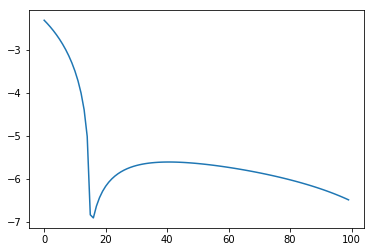

gamma1 1
0 15.829336764535588 23229 7671 0.330233759524732
0 7.914668382267794 17050 3819 0.22398826979472142
0 3.957334191133897 12857 1899 0.1477016411293459
0 1.9786670955669485 9955 961 0.09653440482169764
0.9893335477834743 1.9786670955669485 11543 1458 0.12631031794160963
0.9893335477834743 1.4840003216752113 10799 1219 0.11288082229836095
0.9893335477834743 1.2366669347293429 10377 1094 0.1054254601522598
0.9893335477834743 1.1130002412564086 10171 1025 0.1007767181201455
0.9893335477834743 1.0511668945199415 10060 990 0.09840954274353876
1.020250221151708 1.0511668945199415 10113 1006 0.09947592208049046
1.0357085578358247 1.0511668945199415 10142 1017 0.1002760796687044
1.0357085578358247 1.043437726177883 10126 1011 0.09984199091447758
1.039573142006854 1.043437726177883 10135 1011 0.0997533300444006
1.0415054340923686 1.043437726177883 10139 1015 0.10010849196173192
1.0415054340923686 1.0424715801351259 10138 1013 0.09992108897218387
1.0419885071137474 1.0424715801351259 101

In [4]:
n_rej,t,_=PrimFDR(p,x,5,alpha=0.1,h=None,n_itr=100,verbose=True)

In [10]:
## testing the initialization 
w,a,mu,sigma = ML_init(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)

# plt.figure()
# temp=np.linspace(0,1,101)
# plt.hist(x[h==1],bins=50,weights=1/np.sum(h==1)*50*np.ones([np.sum(h==1)]))
# temp = np.linspace(0,1,101)
# plt.plot(temp,f_all(temp,a,mu,sigma,w))
# plt.show()

### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.923250862995, a=[ 0.44940918 -1.30849121]
Bump 0: w=0.0248348951079, mu=[ 0.58803818  0.57442758], sigma=[ 0.15747715  0.08183423]
Bump 1: w=0.0305436927468, mu=[ 0.32894391  0.26822023], sigma=[ 0.1286829   0.10621428]
Bump 2: w=0.0213705491505, mu=[ 0.69782     0.32363947], sigma=[ 0.12019481  0.1010864 ]


## Testing Summary ##
Num of alternatives: 19896.0
Num of discovery: 10112
Num of true discovery: 9118.0
Actual FDP: 0.0982990506329




### Parameters
n_itr=1000, n_samp=100000, lambda0=119.507184867, lambda1=100.0
### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.923250862995, a=[ 0.44940918 -1.30849121]
Bump 0: w=0.0248348951079, mu=[ 0.58803818  0.57442758], sigma=[ 0.15747715  0.08183423]
Bump 1: w=0.0305436927468, mu=[ 0.32894391  0.26822023], sigma=[ 0.1286829   0.10621428]
Bump 2: w=0.0213705491505, mu=[ 0.69782     0.32363947], sigma=[ 0.12019481  0.1010864 ]


## Summary before optimization ##
## Testing Summary ##
Num of alternatives: 19896.0
Num of discovery: 10109
Num of true discovery: 9115.0
Actual FDP: 0.0983282223761


### initialization value
Slope: a=[ 0.44940919 -1.30849123], b=[-4.63120937]
Bump 0: w=-6.08399, mu=[ 0.58803821  0.5744276 ], sigma=[ 0.04959811  0.01339368]
Bump 1: w=-5.93592, mu=[ 0.32894391  0.26822025], sigma=[ 0.03311858  0.02256295]
Bump 2: w=-6.17534, mu=[ 0.69782001  0.32363948], sigma=[ 0.02889358  0.02043692]


### iteration 0 ###
mean t:  0.00741577
mean 

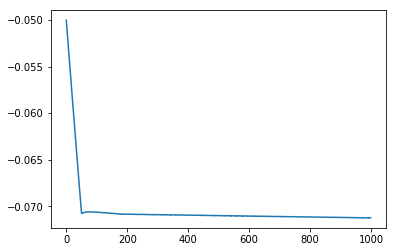

### Summary ###
method: perim_test_1d
# rejections: 10226
FDP: 0.0994523762957
### End Summary ###


In [28]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,3,alpha=0.1,h=h,n_itr=1000,verbose=True)

print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")